In [6]:
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# read data
X_train = pd.read_csv('Data/X_train.csv')
X_test = pd.read_csv('Data/X_test.csv')
y_train = pd.read_csv('Data/y_train.csv')
y_test = pd.read_csv('Data/y_test.csv')

## SVM

In [8]:
def plot_pr_model(y_test, pred_score):
    '''
    plot a pr curve
    '''
    plt.figure(figsize=(4,4))
    prec, rec, threshs = metrics.precision_recall_curve(y_test, pred_score)
    plt.plot(rec, prec)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.grid()
    plt.title("PR curve")

def plot_roc_model(y_test, pred_score):
    '''
    plot a roc curve
    '''
    plt.figure(figsize=(4,4))
    fpr, tpr, threshs = metrics.roc_curve(y_test, pred_score)
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.title("ROC")

In [9]:
# build svm model and predict
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
decision_function = clf.decision_function(X_test)

D:\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
decision_function

array([-2.23335817, -1.17727275, -1.19954714, ...,  3.87703532,
        0.42015916,  1.83570759])

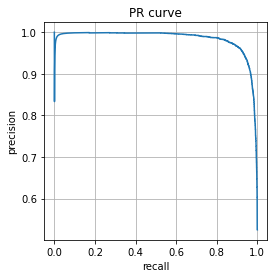

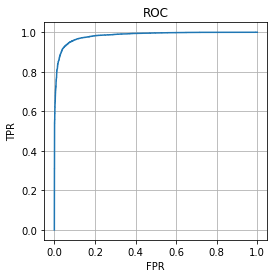

In [11]:
# PR and ROC curve 
y_score = decision_function
plot_pr_model(y_test, y_score)
plot_roc_model(y_test, y_score)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6425
           1       0.95      0.93      0.94      7045

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



## grid search

- linearSVC

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10, 100, 1000]}
l_svc = svm.LinearSVC(max_iter=5000)
gl_clf = GridSearchCV(l_svc, parameters, scoring='accuracy', cv=5)
gl_clf.fit(X_train, y_train.values.ravel())

C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:1206

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=5000),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [46]:
gl_clf.cv_results_

{'mean_fit_time': array([1.00380616, 0.9981267 , 1.21215081, 4.0837595 , 5.2509903 ]),
 'std_fit_time': array([0.0632435 , 0.06052308, 0.05155324, 0.20852224, 0.34144101]),
 'mean_score_time': array([0.04738259, 0.04801407, 0.04499478, 0.04944201, 0.04936104]),
 'std_score_time': array([0.00780278, 0.00896184, 0.0063482 , 0.00805402, 0.01166578]),
 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}],
 'split0_test_score': array([0.93636653, 0.93875278, 0.93700286, 0.9366847 , 0.9327076 ]),
 'split1_test_score': array([0.9298441 , 0.9366847 , 0.93541203, 0.93541203, 0.93429844]),
 'split2_test_score': array([0.94018454, 0.94400255, 0.94416163, 0.94161629, 0.94082087]),
 'split3_test_score': array([0.93953858, 0.94208433, 0.94081146, 0.93747017, 0.9363564 ]),
 'split4_test_score': array([0.93794749, 0.94240255,

In [47]:
df = pd.DataFrame(gl_clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.003806,0.063244,0.047383,0.007803,0.1,{'C': 0.1},0.936367,0.929844,0.940185,0.939539,0.937947,0.936776,0.003711,4
1,0.998127,0.060523,0.048014,0.008962,1,{'C': 1},0.938753,0.936685,0.944003,0.942084,0.942403,0.940785,0.002668,1
2,1.212151,0.051553,0.044995,0.006348,10,{'C': 10},0.937003,0.935412,0.944162,0.940811,0.937947,0.939067,0.003094,2
3,4.083759,0.208522,0.049442,0.008054,100,{'C': 100},0.936685,0.935412,0.941616,0.937470,0.936516,0.937540,0.002142,3
4,5.250990,0.341441,0.049361,0.011666,1000,{'C': 1000},0.932708,0.934298,0.940821,0.936356,0.935243,0.935885,0.002743,5


In [48]:
print(gl_clf.best_params_)
print(gl_clf.best_score_)

{'C': 1}
0.9407853797923483


 - SVC(), linear & rbf

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
svc = svm.SVC()
g_clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=5, n_jobs = -1)
g_clf.fit(X_train, y_train)

C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')})

In [38]:
df = pd.DataFrame(g_clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,555.217393,3.503849,120.992985,1.598643,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.928253,0.924753,0.934139,0.932856,0.931265,0.930253,0.003381,5
1,733.326167,18.533807,263.060141,8.107905,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.923640,0.921890,0.929844,0.930151,0.929833,0.927072,0.003562,6
2,315.127759,7.307594,62.067229,1.617525,1,linear,"{'C': 1, 'kernel': 'linear'}",0.934298,0.932867,0.937480,0.940016,0.942562,0.937445,0.003568,3
3,1178.009401,57.189153,173.700234,39.646993,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.943048,0.942094,0.946707,0.948449,0.948290,0.945717,0.002658,2
4,398.452984,10.180773,44.368942,0.936719,10,linear,"{'C': 10, 'kernel': 'linear'}",0.932867,0.932549,0.939707,0.935879,0.938425,0.935885,0.002874,4
5,2135.734790,45.722686,161.239749,3.592646,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.943684,0.942730,0.949252,0.948130,0.948608,0.946481,0.002714,1


In [27]:
print(g_clf.best_params_)
print(g_clf.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.9464809652645787


## final model

In [5]:
# build svm model and predict
clf = svm.SVC(kernel='rbf', C=10)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
y_score = clf.decision_function(X_test)

In [6]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('y_pred_svm.csv',index=False)

 Accuracy of ssvm : 95.06 %
 Confusion Matrix of svm : 
 [[6090  335]
 [ 331 6714]]
 Classification Report of svm : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6425
           1       0.95      0.95      0.95      7045

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



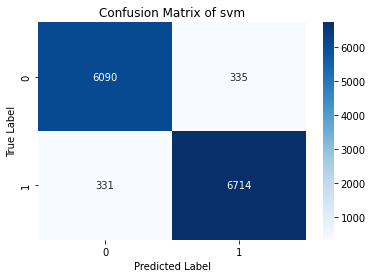

<Figure size 432x288 with 0 Axes>

In [9]:
# Evaluate the model
print(f" Accuracy of ssvm : {round(metrics.accuracy_score(y_test, y_pred) ,4) * 100} %")
print(f" Confusion Matrix of svm : \n {metrics.confusion_matrix(y_test, y_pred)}")
print(f" Classification Report of svm : \n {metrics.classification_report(y_test, y_pred)}")
# Plot the confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of svm')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Save the plot
plt.savefig('Confusion Matrix of svm.png')

In [10]:
precision_svm, recall_svm, threshs = metrics.precision_recall_curve(y_test, y_score)
fpr_svm, tpr_svm, threshs = metrics.roc_curve(y_test, y_score)

In [11]:
PR_svm = pd.DataFrame({'precision_svm':precision_svm, 'recall_svm':recall_svm})
ROC_svm = pd.DataFrame({'fpr_svm':fpr_svm, 'tpr_svm':tpr_svm})
PR_svm.to_csv('PR_svm.csv',index=False)
ROC_svm.to_csv('ROC_svm.csv',index=False)

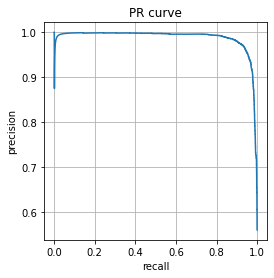

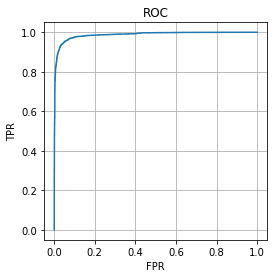

In [13]:
plot_pr_model(y_test, y_score)
plot_roc_model(y_test, y_score)

## 幫跑一下part

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10, 100]}
svc = svm.SVC(kernel='rbf')
gr_clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=5)
gr_clf.fit(X_train, y_train.values.ravel())

NameError: name 'gl_clf' is not defined

In [16]:
df = pd.DataFrame(gr_clf.cv_results_)
print(df)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     360.309816      6.820539       119.681429        1.023612     0.1   
1     569.391664     58.110853        79.524198        6.967958       1   
2    1074.159868     89.677596        85.655943        5.691337      10   
3    1679.480963    797.742522        81.692730        3.218399     100   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.1}           0.923640           0.921890           0.929844   
1    {'C': 1}           0.943048           0.942094           0.946707   
2   {'C': 10}           0.943684           0.942730           0.949252   
3  {'C': 100}           0.943684           0.942730           0.949093   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.930151           0.929833         0.927072        0.003562   
1           0.948449           0.948290         0.945717        0.002658   
2           0.948130     

 Accuracy of ssvm : 95.06 %
 Confusion Matrix of svm : 
 [[6090  335]
 [ 331 6714]]
 Classification Report of svm : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6425
           1       0.95      0.95      0.95      7045

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



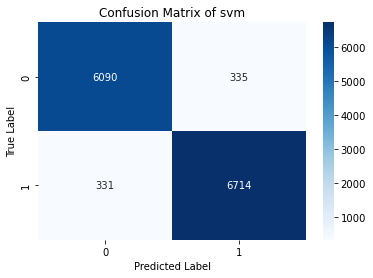

<Figure size 432x288 with 0 Axes>

In [17]:
y_pred = gr_clf.predict(X_test)
y_score = gr_clf.decision_function(X_test)
# Evaluate the model
print(f" Accuracy of ssvm : {round(metrics.accuracy_score(y_test, y_pred) ,4) * 100} %")
print(f" Confusion Matrix of svm : \n {metrics.confusion_matrix(y_test, y_pred)}")
print(f" Classification Report of svm : \n {metrics.classification_report(y_test, y_pred)}")
# Plot the confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of svm')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Save the plot
plt.savefig('Confusion Matrix of svm.png')